# Задание
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork. 
Данные нейросети:

  -три входа (𝑥1, 𝑥2, 𝑥3);

  -три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3);

  -выход (𝑜1).

Нейроны имеют идентичные веса и пороги:

  -w = [0.5, 0.5, 0.5]

  -b = 0

Данные нейросети:

  -два входа (𝑥1, 𝑥2);

  -два нейрона в скрытых слоях (ℎ1, ℎ2);

  -два выхода (𝑜1, 𝑜2).

Нейроны имеют идентичные веса и пороги:

  -w = [1, 0];

  -b = 1.

In [11]:
class Neuron:
    def __init__(self, w, b):
        self.w = w
        self.b = b
    def ffSigmoid(self, inputs):
        total = np.dot(self.w, inputs) + self.b
        return Sigmoid(total)
    def ffTanh(self, inputs):
        total = np.dot(self.w, inputs) + self.b
        return Tanh(total)
    def ffReLU(self, inputs):
        total = np.dot(self.w, inputs) + self.b
        return ReLU(total)

class NeuralNetwork1:
    def __init__(self):
        w = np.array([0.5, 0.5, 0.5])
        b = 0
        self.h1 = Neuron(w, b)
        self.h2 = Neuron(w, b)
        self.h3 = Neuron(w, b)
        self.o1 = Neuron(w, b)
    def feedforwardSigmoid(self, x):
        out1 = self.h1.ffSigmoid(x)
        out2 = self.h2.ffSigmoid(x)
        out3 = self.h3.ffSigmoid(x)
        outf = self.o1.ffSigmoid(np.array([out1, out2, out3]))
        return outf
    def feedforwardTanh(self, x):
        out1 = self.h1.ffTanh(x)
        out2 = self.h2.ffTanh(x)
        out3 = self.h3.ffTanh(x)
        outf = self.o1.ffTanh(np.array([out1, out2, out3]))
        return outf
    def feedforwardReLU(self, x):
        out1 = self.h1.ffReLU(x)
        out2 = self.h2.ffReLU(x)
        out3 = self.h3.ffReLU(x)
        outf = self.o1.ffReLU(np.array([out1, out2, out3]))
        return outf
    

    
network1 = NeuralNetwork1()
x1 = np.array([1, 2, 3])
print('Первая нейросеть')
print('Sigmoid: ', network1.feedforwardSigmoid(x1))
print('Tanh: ', network1.feedforwardTanh(x1))
print('ReLU: ', network1.feedforwardReLU(x1))
print()

Первая нейросеть
Sigmoid:  0.8067238139969796
Tanh:  -0.21713906537767277
ReLU:  4.5



Реализуйте классы нейронных сетей с использованием других функций 
активации.

In [13]:
import numpy as np

def Sigmoid(x):
    return 1 / (1 + np.exp(-x))
def Tanh(x):
    return np.tan(x)
def ReLU(x):
    return max(0,x)

class NeuralNetwork2:
    def __init__(self):
        w = np.array([1, 0])
        b = 1
        self.h1 = Neuron(w, b)
        self.h2 = Neuron(w, b)
        self.o1 = Neuron(w, b)
        self.o2 = Neuron(w, b)
    def feedforwardSigmoid(self, x):
        out1 = self.h1.ffSigmoid(x)
        out2 = self.h2.ffSigmoid(x)
        out1 = self.o1.ffSigmoid(np.array([out1, out2]))
        out2 = self.o2.ffSigmoid(np.array([out1, out2]))
        return out1, out2
    def feedforwardTanh(self, x):
        out1 = self.h1.ffTanh(x)
        out2 = self.h2.ffTanh(x)
        out1 = self.o1.ffTanh(np.array([out1, out2]))
        out2 = self.o2.ffTanh(np.array([out1, out2]))
        return out1, out2
    def feedforwardReLU(self, x):
        out1 = self.h1.ffReLU(x)
        out2 = self.h2.ffReLU(x)
        out1 = self.o1.ffReLU(np.array([out1, out2]))
        out2 = self.o2.ffReLU(np.array([out1, out2]))
        return out1, out2

network2 = NeuralNetwork2()
x2 = np.array([2, 3])
print('Вторая нейросеть')
print('Sigmoid: ', network2.feedforwardSigmoid(x2))
print('Tanh: ', network2.feedforwardTanh(x2))
print('ReLU: ', network2.feedforwardReLU(x2))

Вторая нейросеть
Sigmoid:  (0.8757270529783324, 0.8671195555587996)
Tanh:  (1.1555911185916798, -1.5104758308623794)
ReLU:  (4, 5)


# 1.2. Введение в нейронные сети с помощью Scikit-Learn в Python

Теперь мы знаем, что такое нейронные сети и какие шаги необходимо 
выполнить, чтобы построить простую нейронную сеть с плотными связями. 
В этом разделе мы попытаемся построить простую нейронную сеть, которая
предсказывает класс, к которому принадлежит данное растение ириса. Мы 
будем использовать библиотеку Python Scikit-Learn для создания нашей 
нейронной сети.
Sklearn предоставляет 2 оценщика для задач классификации и 
регрессии соответственно:
 MLPClassifier;
 MLPRegressor 
Начнем с импорта необходимых библиотек.

In [15]:
#Загрузка библиотек 


# MLPClassifier

Загрузка данных
Мы будем загружать два набора данных.
Набор данных цифр: мы будем использовать набор данных цифр, 
который имеет изображения размером 8x8 для цифр 0-9. Ниже мы будем 
использовать цифровые данные для задач классификации.
Набор данных о жилье в Бостоне: мы будем использовать набор 
данных о жилье в Бостоне, который содержит информацию о различных 
свойствах дома, таких как среднее количество комнат, уровень преступности 
на душу населения в городе и т. д. Мы будем использовать его для задач 
регрессии.
Sklearn предоставляет оба этих набора данных. Мы можем загрузить 
их, вызвав методы load_digits() и load_boston().


In [18]:
from sklearn.datasets import load_digits, load_boston

digits = load_digits() 
X_digits, Y_digits = digits.data, digits.target 
print('Dataset Sizes:', X_digits.shape, Y_digits.shape)

ImportError: ignored

In [ ]:
boston = load_boston() 
X_boston, Y_boston = boston.data, boston.target 
print('Dataset Sizes:',X_boston. shape, Y_boston.shape)

Dataset Sizes: (506, 13) (506,)


Классификация
MLPClassifier — это клвсс, доступный как часть модуля neuro_network 
sklearn для выполнения задач классификации с использованием 
многослойного персептрона.
Как обычно разделим набор данных на две части:
 данные обучения, которые будут использоваться для модели 
обучения;
 тестовые данные, по которым будет проверяться точность 
обученной модели.
Функция train_test_split модуля model_selection sklearn поможет нам 
разделить данные на два набора: 80% для обучения и 20% для тестирования. 
Мы также используем seed(random_state=123) с train_test_split, чтобы мы 
всегда получали одно и то же разделение и могли сравнивать и 
воспроизволить результаты в будущем.


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.80, test_size=0.20, stratify=Y_digits, random_state=123)
print('Train/Test Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

NameError: ignored

Для начала натренируем модель MLPClassifier с параметрами по умолчанию 
для тренировочных данных.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123) 
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(random_state=123)

In [ ]:
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15]) 
print(Y_test[:15]) 
## Метод Score для оценки точности моделей классификации. 
print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


Cоздадим метод plot_confusion_matrix(), который принимает исходные и 
предсказанные метки данных по модели. Затем он строит матрицу путаницы, 
используя matplotlib.


[[36  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  1 33  0  0  0  0  1  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  1 36  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  1]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  0 36]]


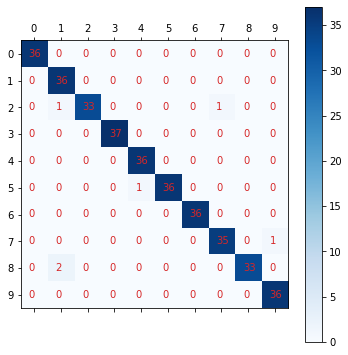

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds) 
    print(conf_mat) 
    fig = plt.figure(figsize=(6,6)) 
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1) 
    plt.yticks(range(10), range(10)) 
    plt.xticks(range(10), range(10)) 
    plt.colorbar(); 
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')
            
plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

Ниже приведен список важных атрибутов, доступных с MLPClassifier, 
которые могут предоставить значимую информацию после обучения 
модели.
 loss_ — возвращает убыток после завершения процесса обучения.
 coefs_ — возвращает массив длины n_layers-1, где каждый элемент 
представляет веса, связанные с уровнем i.
 intercepts_ — возвращает массив длины n_layers-1, где каждый 
элемент представляет собой перехват, связанный с персептронами 
слоя i.
 n_iter_ — количество итераций, для которых выполнялась оценка.
 out_activation_ — возвращает имя функции активации выходного 
слоя.

In [ ]:
print("Loss : ", mlp_classifier.loss_) 
print("Number of Coefs : ", len(mlp_classifier.coefs_)) 
print("Number of Intercepts : ", len(mlp_classifier.intercepts_)) 
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_) 
print("Name of Output Layer Activation Function : ",mlp_classifier.out_activation_)

Loss :  0.0034728684994180608
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Which Estimator Ran :  125
Name of Output Layer Activation Function :  softmax


# MLPRegressor
MLPRegressor — это класс, доступный как часть библиотеки 
neuro_network sklearn для выполнения задач регрессии с использованием 
многослойного персептрона. Также разделим набор данных на две части:
 данные обучения (80%), которые будут использоваться для 
модели обучения;
 тестовые данные (20%), по которым будет проверяться точность 
обученной модели.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=0.80, test_size=0.20, random_state=123) 
print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes :  (404, 13) (102, 13) (404,) (102,)


In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123) 
mlp_regressor.fit(X_train, Y_train)

MLPRegressor(random_state=123)

In [ ]:
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:10]) 
print(Y_test[:10]) ## Метод Score оценивает точность моделей классификации. 
print('Test R*2 Score : %.3f'%mlp_regressor.score(X_test, Y_test)) 
print('Training R*2 Score : %.3f'%mlp_regressor.score(X_train, Y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R*2 Score : 0.462
Training R*2 Score : 0.510


MLPRegressor имеет все атрибуты такие же, как и у MLPClassifier:


In [ ]:
print("Loss :", mlp_regressor.loss_)

Loss : 28.538174061119626


In [ ]:
print("Number of Coefs : ", len(mlp_regressor.coefs_)) 
[weights.shape for weights in mlp_regressor.coefs_]

Number of Coefs :  2


[(13, 100), (100, 1)]

In [ ]:
print("Number of Iterations for Which Estimator Ran :", mlp_regressor.n_iter_)

Number of Iterations for Which Estimator Ran : 130


In [ ]:
print("Name of Output Layer Activation Function :",mlp_regressor.out_activation_)

Name of Output Layer Activation Function : identity


Используйте классы MLPClassified и MLPRegressor для классификации и 
регрессии произвольных данных из интернета. Проведите анализ 
атрибуты, полученных моделей.
Для классификации можете взять набор данных Ирисов:
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы:
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv 

In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
print('----------MLPClassifier----------\n')

data = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
X_data, Y_data = data['sepal.length'], data['sepal.width']
X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=.80, test_size=.20, stratify=Y_digits, random_state=123)
mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)
Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:20])
print(Y_test[:20])
print('Dataset Sizes:', X_data.shape, Y_data.shape)
print('Train/Test Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))
print('Loss:', mlp_classifier.loss_)
print('Number of Coefs:', len(mlp_classifier.coefs_))
print('Number of Intercepts:', len(mlp_classifier.intercepts_))
print('Number of Iterations for Which Estimator Ran:', mlp_classifier.n_iter_)
print('Name of Output Layer Activation Function:', mlp_classifier.out_activation_)
print('\n----------MLPRegressor----------\n')

data = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
X_data, Y_data = data['YearsExperience'], data['Salary']
X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston, train_size=.80, test_size=.20, random_state=123)
mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(X_train, Y_train)
Y_preds = mlp_regressor.predict(X_test)

print(Y_preds[:20])
print(Y_test[:20])
print('Dataset Sizes:', X_data.shape, Y_data.shape)
print('Train/Test Sizes:', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print('Test R^2 Score: %.3f'%mlp_regressor.score(X_test, Y_test))
print('Training R^2 Score: %.3f'%mlp_regressor.score(X_train, Y_train))
print('Loss:', mlp_regressor.loss_)
print('Number of Coefs:', len(mlp_regressor.coefs_))
print('Number of Iterations for Which Estimator Ran:', mlp_regressor.n_iter_)
print('Name of Output Layer Activation Function:', mlp_regressor.out_activation_)

----------MLPClassifier----------



NameError: ignored